# Profitability Analysis: Insights for New Movie Studio

**Group: 2 B**

**Student Pace: DSF-FT12-Hybrid**

**Instructor Name: Samuel Karu**

## **1. Business Understanding**

### Introduction

#### **Objective**

The goal of this project is to assist a new movie studio in making data-driven decisions regarding the types of films to produce. The movie industry has seen significant success from companies that create original video content, and our aim is to help this new studio maximize its profitability. By analyzing historical data from previous films, we aim to uncover patterns and insights that will inform the company's decision-making for its new movie production studio.

#### **Business Question**

The key business question is:
- Which **predictor factors** can the _company_  leverage to optimize the **profitability** of its _new movie studio_?

The scope of our project _narrows-down_ to **four predictor factors:**
- **Genre**: Which movie genres tend to perform best at the box office?
- **Production Budget**: Does a higher production budget lead to higher profitability?
- **Release Season**: Are certain seasons (e.g., summer) more profitable for movie releases?
- **Director and Actor Impact**: Do popular/ top-performing actors and directors contribute significantly to a film's financial success?


### Workflow Summary

1. **Data Loading**: Multiple datasets are loaded from CSV files and the im.db SQLite database.
2. **Data Cleaning**: Missing values and duplicates are handled, and outliers removed using statistical methods like IQR.
3. **Feature Engineering**: New features such as `movie_profit/loss`, `release_month`, and `season` are created to enhance the analysis.
4. **Data Merging**: Datasets are merged to create a comprehensive `final_df` containing all relevant information.
5. **Exploratory Data Analysis (EDA)**: Visualizations and statistical summaries are used to explore relationships between variables.
6. **Hypothesis Testing**: ANOVA, Pearson correlation coefficient, and chi-square tests are conducted to validate hypotheses. Visualizations 
7. **Insights and Results**: Business recommendations are deduced based on quantitative findings.


## **2. Data Understanding**

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

### Load the .csv datasets

**Box Office Mojo Dataset** (_bom.movie_gross.csv.gz_): Contains data on movie titles, domestic and foreign gross revenue, studio, and year of release.

**Budgets Dataset** (_tn.movie_budgets.csv.gz_): Contains data on movie titles, production budgets, worldwide gross revenue, and release dates.

In [2]:
# Load BOM dataset and budgets dataset
bom_df = pd.read_csv('./zipped-data/bom.movie_gross.csv')
budgets_df = pd.read_csv('./zipped-data/tn.movie_budgets.csv')

In [3]:
# Review the first five rows of bom_df
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [4]:
# Review the first five rows of budgets_df
budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


### Connect and load the im.db Database
Connect im.db and querry the database to retrieve the names of its tables.

In [5]:
# Load the imdb database
conn = sqlite3.connect('./zipped-data/im.db')
pd.read_sql("SELECT name FROM sqlite_master WHERE type=='table'",conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


#### Load the movie_basics Table

Select relevant columns from the movie_basics table per the scope of our project. These include: `movie_id`, `primary_title`, `runtime_minutes`, and `genres`.

In [6]:
# Load the movie_basics dataset from the SQLite database
query = """
SELECT 
    movie_id, 
    primary_title, 
    runtime_minutes, 
    genres
FROM movie_basics
"""
movie_basics = pd.read_sql_query(query, conn)
movie_basics.head()

,movie_id,primary_title,runtime_minutes,genres
0,tt0063540,Sunghursh,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,122.0,Drama
3,tt0069204,Sabse Bada Sukh,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,80.0,"Comedy,Drama,Fantasy"


 #### Load the movie_ratings Table

Select relevant columns from the movie_ratings table per the scope of our project. These include: `movie_id`, `averagerating`, and `numvotes`.

In [7]:
query = """
SELECT 
    movie_id, 
    averagerating, 
    numvotes
FROM movie_ratings
"""
movie_ratings = pd.read_sql_query(query, conn)
movie_ratings.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


#### Load the persons Table

Select relevant columns from the persons table per the scope of our project. These include: `person_id`, and `primary_name`.

In [8]:
query = """
SELECT 
    person_id, 
    primary_name
FROM persons
"""
persons = pd.read_sql_query(query, conn)
persons.head()

,person_id,primary_name
0,nm0061671,Mary Ellen Bauder
1,nm0061865,Joseph Bauer
2,nm0062070,Bruce Baum
3,nm0062195,Axel Baumann
4,nm0062798,Pete Baxter


#### Load the principals Table

Select relevant columns from the principals table per the scope of our project. These include: `movie_id`, `person_id`, and `job`.

In [9]:
query = """
SELECT 
    movie_id, 
    person_id, 
    job
FROM principals
"""
principals = pd.read_sql_query(query, conn)
principals.head()

,movie_id,person_id,job
0,tt0111414,nm0246005,None
1,tt0111414,nm0398271,None
2,tt0111414,nm3739909,producer
3,tt0323808,nm0059247,None
4,tt0323808,nm3579312,None


#### Load the Directors Data
We queried and loaded the directors' information by joining the directors and persons tables from the im.db database.
We selected the `movie_id`, `person_id`, and `primary_name` (aliased as director_name) for individuals whose category was specified as "director."

In [10]:
directors = pd.read_sql("""
SELECT 
    movie_id, person_id, primary_name AS director_name
FROM directors
INNER JOIN persons
USING(person_id)
""",conn)
directors.head()

,movie_id,person_id,director_name
0,tt0285252,nm0899854,Tony Vitale
1,tt0462036,nm1940585,Bill Haley
2,tt0835418,nm0151540,Jay Chandrasekhar
3,tt0835418,nm0151540,Jay Chandrasekhar
4,tt0878654,nm0089502,Albert Pyun


#### Load the Actors Data
We queried and loaded the actors' information by joining the principals and persons tables from the im.db database.
We selected the `movie_id`, `person_id`, and `primary_name` (aliased as actor_name) for individuals whose category was specified as "actor."

In [11]:
actors = pd.read_sql("""
SELECT 
    movie_id, person_id, primary_name AS actor_name
FROM principals
INNER JOIN persons
USING(person_id)
WHERE category = 'actor' 
""",conn)
actors.head()

,movie_id,person_id,actor_name
0,tt0111414,nm0246005,Tommy Dysart
1,tt0323808,nm2694680,Henry Garrett
2,tt0323808,nm0574615,Graham McTavish
3,tt0417610,nm0532721,Luis Machín
4,tt0417610,nm0069209,Carlos Belloso


## 3. Data Preparation

In this phase, we clean and merge the datasets to create a comprehensive dataframe for analysis.

### **Data Cleaning**

Clean the monetary columns by removing dollar signs (`$`) and commas, then convert the values into numeric data types.  
* For the `budgets_df` dataset; clean the `production_budget`, `domestic_gross`, & `worldwide_gross` columns and convert them to the numeric dtype.
* For the `movie_ratings` dataset; convert the `averagerating` and `numvotes` columns to the numeric dtype.
* For the `bom_df` dataset, convert the `domestic_gross` and `foreign_gross` columns to the numeric dtype.

In [12]:
# Remove $ and commas, then convert to numeric
money_cols = ['production_budget', 'domestic_gross', 'worldwide_gross']

for col in money_cols:
    budgets_df[col] = budgets_df[col].replace({r'\$': '', ',': ''}, regex=True)
    budgets_df[col] = pd.to_numeric(budgets_df[col], errors='coerce')

movie_ratings['averagerating'] = pd.to_numeric(movie_ratings['averagerating'], errors='coerce')
movie_ratings['numvotes'] = pd.to_numeric(movie_ratings['numvotes'], errors='coerce')

# Convert to numeric, setting errors='coerce' will turn invalid values into NaN
bom_df['domestic_gross'] = pd.to_numeric(bom_df['domestic_gross'], errors='coerce')
bom_df['foreign_gross'] = pd.to_numeric(bom_df['foreign_gross'], errors='coerce')

# Convert 'release_date' to datetime format
budgets_df['release_date'] = pd.to_datetime(budgets_df['release_date'], errors='coerce')


#### **Check for Missing Values and Duplicates**

Define the _check_duplicates_missing()_ function to check duplicate entries and missing values in a DataFrame.

In [13]:
# Define a function to check missing values and duplicates
def check_duplicates_missing(df):
    print('Duplicated:')
    print(df.duplicated().value_counts())
    print('\nMissing values:')
    print(df.isna().sum())
    return df

Call the _check_duplicates_missing()_ function to check duplicate entries and missing values for each DataFrame.

In [14]:
# Check Missing Values and Duplicates

# Check on bom_df
print("BOM DataFrame:")
check_duplicates_missing(bom_df)

# Check on movie_basics
print("\nMovie Basics DataFrame:")
check_duplicates_missing(movie_basics)

# Check on movie_ratings
print("\nMovie Ratings DataFrame:")
check_duplicates_missing(movie_ratings)

# Check on principals
print("\nActors DataFrame:")   
check_duplicates_missing(actors)

# Check on persons
print("\ndirectors:")
check_duplicates_missing(directors)

print("\nBudgets DataFrame:") 
check_duplicates_missing(budgets_df)

BOM DataFrame:
Duplicated:
False    3387
dtype: int64

Missing values:
title                0
studio               5
domestic_gross      28
foreign_gross     1355
year                 0
dtype: int64

Movie Basics DataFrame:
Duplicated:
False    146144
dtype: int64

Missing values:
movie_id               0
primary_title          0
runtime_minutes    31739
genres              5408
dtype: int64

Movie Ratings DataFrame:
Duplicated:
False    73856
dtype: int64

Missing values:
movie_id         0
averagerating    0
numvotes         0
dtype: int64

Actors DataFrame:
Duplicated:
False    256543
True         18
dtype: int64

Missing values:
movie_id      0
person_id     0
actor_name    0
dtype: int64

directors:
Duplicated:
False    163533
True     127638
dtype: int64

Missing values:
movie_id         0
person_id        0
director_name    0
dtype: int64

Budgets DataFrame:
Duplicated:
False    5782
dtype: int64

Missing values:
id                   0
release_date         0
movie               

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0


#### **Handle Missing Values and Duplicates**

Define the _filling_missing()_ function to handle missing values in each dataframe per the following criteria:

1. **Remove Duplicate Rows:** To ensure each record is unique.

2. **Dropping Sparse Columns:** Remove any column with more than 70% missing values (sparsity makes a column unreliable for data analysis).

3. **Imputing Numeric Columns**  
   - For each numeric column with missing data, computes its respective skewness.  
   - If the distribution is fairly symmetric (|skewness| < 0.5), missing values are imputed with the mean.  
   - Otherwise, missing values are imputed with the median (to minimize the effect of outliers).

4. **Imputing Categorical Columns**  
   - For each categorical column with missing data, missing values are imputed with the most frequent category (mode).  
   - If a categorical column doesn't have a mode, the placeholder `"Unknown"` is imputed.

In [15]:
def filling_missing(df):
    # Drop duplicate rows
    df = df.drop_duplicates()

    # Drop columns with more than 70% missing values 
    df = df.dropna(thresh=0.7 * len(df), axis=1)

    # Impute missing values in numeric columns
    for col in df.select_dtypes(include=['number']).columns:
        if df[col].isna().sum() > 0:
            skewness = df[col].skew()
            fill_value = df[col].mean() if abs(skewness) < 0.5 else df[col].median()
            df[col] = df[col].fillna(fill_value)  

    # Impute missing values in categorical columns
    for col in df.select_dtypes(exclude=['number']).columns:
        if df[col].isna().sum() > 0:
            most_frequent = df[col].mode()[0] if not df[col].mode().empty else "Unknown"
            df[col] = df[col].fillna(most_frequent)  

    return df

In [16]:
# Call the filling_missing function for each DataFrame to handle missing values

bom_df = filling_missing(bom_df)
movie_basics = filling_missing(movie_basics)
acors = filling_missing(actors)
directors = filling_missing(directors)
budgets_df = filling_missing(budgets_df)

#### **Validate Data Quality After Cleaning**

Verify that each cleaned dataframe neither has duplicate entries nor missing values:

- **BOM DataFrame**: Confirm there are no duplicate box office records and no missing financial entries.  
- **Movie Basics DataFrame**: Ensure all movie metadata (titles, runtimes, genres) are complete and unique.  
- **Persons DataFrame**: Validate that each person (director, actor) appeares once and there are no missing identifiers or names.  
- **Budgets DataFrame**: Veryfy that production budgets and gross figures are fully populated without duplicate entries.  


In [17]:
# Check for Missing Values and Duplicates after Cleaning

# Run the check on bom_df
print("BOM DataFrame:")
check_duplicates_missing(bom_df)

# Run the check on movie_basics
print("\nMovie Basics DataFrame:")
check_duplicates_missing(movie_basics)

# Run the check on persons
print("\nPersons DataFrame:")
check_duplicates_missing(persons)

# Run the check on budgets_df
print("\nBudgets DataFrame:")   
check_duplicates_missing(budgets_df)

BOM DataFrame:
Duplicated:
False    3387
dtype: int64

Missing values:
title             0
studio            0
domestic_gross    0
year              0
dtype: int64

Movie Basics DataFrame:
Duplicated:
False    146144
dtype: int64

Missing values:
movie_id           0
primary_title      0
runtime_minutes    0
genres             0
dtype: int64

Persons DataFrame:
Duplicated:
False    606648
dtype: int64

Missing values:
person_id       0
primary_name    0
dtype: int64

Budgets DataFrame:
Duplicated:
False    5782
dtype: int64

Missing values:
id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0


In [18]:
# Define the function dsetinfo() to check column attributes
def dsetinfo(df):
    print("DataFrame Info:")
    print(df.info())
    return df

# Check the info of each DataFrame
print("BOM DataFrame:")
dsetinfo(bom_df)

print("\nMovie Basics DataFrame:")
dsetinfo(movie_basics)

print("\nMovie Ratings DataFrame:")
dsetinfo(movie_ratings)

print("\nActors DataFrame:")
dsetinfo(actors)

print("\nDirectors DataFrame:")
dsetinfo(directors)

print("\nBudgets DataFrame:")
dsetinfo(budgets_df)

BOM DataFrame:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3387 entries, 0 to 3386
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3387 non-null   object 
 2   domestic_gross  3387 non-null   float64
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB
None

Movie Basics DataFrame:
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 146144 entries, 0 to 146143
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   runtime_minutes  146144 non-null  float64
 3   genres           146144 non-null  object 
dtypes: float64(1), object(3)
memory usage: 5.6+ MB
None

Movie Ratings DataFrame:
DataFram

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,7000,0,0
5778,79,1999-04-02,Following,6000,48482,240495
5779,80,2005-07-13,Return to the Land of Wonders,5000,1338,1338
5780,81,2015-09-29,A Plague So Pleasant,1400,0,0


### **Remove Outliers Using the IQR Method**

Define the _remove_outliers(df, cols)_ function to filter extreme values in specified numeric columns per the following criteria:

1. **Compute the Interquartile Range (IQR)**  
   For each column:
   - Calculate the 1st quartile (Q1) and 3rd quartile (Q3).
   - Compute IQR = Q3 – Q1.
   

2. **Determine Boundaries**  
   - Lower bound = Q1 − 1.5 × IQR  
   - Upper bound = Q3 + 1.5 × IQR


3. **Filter Rows**  
   - Retain rows whose specified columns' value falls-in between the lower and upper bounds.

In [19]:
# Define a function to remove outliers using IQR
def remove_outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

    
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

Call the _remove_outliers()_ function to remove outliers for the following columns in the four DataFrames

- **Box Office Data (`bom_df`)**: Filter outliers in both `domestic_gross` and `foreign_gross`.  
- **Movie Basics (`movie_basics`)**: Remove extreme values in `runtime_minutes`.  
- **Movie Ratings (`movie_ratings`)**: Exclude outlier in `averagerating` and `numvotes`.  
- **Budgets Data (`budgets_df`)**: Filter outliers in `production_budget`, `domestic_gross`, and `worldwide_gross`.  

In [20]:
# Call the remove_outliers function 
bom_df = remove_outliers(bom_df, ['domestic_gross'])
movie_basics = remove_outliers(movie_basics, ['runtime_minutes'])
movie_ratings = remove_outliers(movie_ratings, ['averagerating', 'numvotes'])
budgets_df = remove_outliers(budgets_df, ['production_budget', 'domestic_gross', 'worldwide_gross'])

### **Merging Datasets**

All cleaned and enriched tables are merged to form a single comprehensive dataframe (`final_df`) for analysis:

1. **Box Office & Movie Basics**  
   – Left‐joined `bom_df` (box office gross) with `movie_basics` on movie titles.  
2. **Budgets**  
   – Left‐joined the resulting dataframe with `budgets_df`, matching on title.  
3. **Ratings**  
   – Left‐joined the combined dataframe with `movie_ratings` on `movie_id`.  
4. **Directors & Actors**  
   – Left‐joined directors’ names and actors’ names from the IMDb tables (via `movie_id`).  
5. **Deduplication**  
   – Removed any duplicate rows based on `movie_id` to ensure each film appeared only once.

In [21]:
# If not already done, extract year from release_date
budgets_df['year'] = budgets_df['release_date'].dt.year

In [22]:
# Rename budget's 'movie' column to match with 'title' for clarity
budgets_df = budgets_df.rename(columns={'movie': 'title'})

# Merge Budgets with BOM on title and year (both datasets have them)
merged_df = pd.merge(
    budgets_df, 
    bom_df[['title', 'studio', 'year']], 
    on=['title', 'year'], 
    how='left'
)

# Merge with Movie Basics using fuzzy match or external title->movie_id map

title_to_id = movie_basics[['movie_id','genres', 'primary_title']]
merged_df = pd.merge(
    merged_df, 
    title_to_id, 
    left_on='title', 
    right_on='primary_title', 
    how='left'
)

# Add ratings
merged_df = pd.merge(
    merged_df, 
    movie_ratings, 
    on='movie_id', 
    how='left'
)

# add directors/actors
merged_df = pd.merge(
    merged_df, 
    directors[['movie_id', 'director_name']], 
    on='movie_id', 
    how='left'
)

merged_df = pd.merge(
    merged_df, 
    actors[['movie_id', 'actor_name']], 
    on='movie_id', 
    how='left'
)


# Final check
merged_df.info(), 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10196 entries, 0 to 10195
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 10196 non-null  int64         
 1   release_date       10196 non-null  datetime64[ns]
 2   title              10196 non-null  object        
 3   production_budget  10196 non-null  int64         
 4   domestic_gross     10196 non-null  int64         
 5   worldwide_gross    10196 non-null  int64         
 6   year               10196 non-null  int64         
 7   studio             2467 non-null   object        
 8   movie_id           7283 non-null   object        
 9   genres             7283 non-null   object        
 10  primary_title      7283 non-null   object        
 11  averagerating      2233 non-null   float64       
 12  numvotes           2233 non-null   float64       
 13  director_name      7173 non-null   object        
 14  actor_

(None,)

In [23]:
# Drop exact duplicates
# final_df = merged_df.drop_duplicates()
# Or keep only the first actor/director per movie (for simplicity)
final_df = merged_df.drop_duplicates(subset=['movie_id'])    

In [24]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2686 entries, 0 to 10191
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 2686 non-null   int64         
 1   release_date       2686 non-null   datetime64[ns]
 2   title              2686 non-null   object        
 3   production_budget  2686 non-null   int64         
 4   domestic_gross     2686 non-null   int64         
 5   worldwide_gross    2686 non-null   int64         
 6   year               2686 non-null   int64         
 7   studio             894 non-null    object        
 8   movie_id           2685 non-null   object        
 9   genres             2685 non-null   object        
 10  primary_title      2685 non-null   object        
 11  averagerating      787 non-null    float64       
 12  numvotes           787 non-null    float64       
 13  director_name      2625 non-null   object        
 14  actor_n

#### **Impute Remaining Missing Data and Final Validation**

Call the _filling_missing()_ function and pass in the merged dataframe (`final_df`) to remove any remaining duplicates, drop sparse columns, and impute missing values in both numeric and categorical fields according to the previously defined criteria.

In [25]:
# Impute Missing values by calling the filling_missing() function
final_df=filling_missing(final_df)

#### **Column Renaming and Cleanup**

We improved clarity and reduced clutter by:

1. **Renaming Columns**  
   - Renamed `domestic_gross_x` to `domestic_gross` to standardize naming.

2. **Dropping Unnecessary Columns**  
   - Removed intermediate and redundant fields that were no longer needed for analysis:
     - `primary_title`, `original_title`, `movie`, `id`  
     - `person_id_x`, `person_id_y`  
     - `domestic_gross_y`  


In [26]:
# Rename for clarity
final_df = final_df.drop(columns=['primary_title', 'id'], errors='ignore')

### **Feature Engineering**

To enrich the dataset with actionable attributes, we created the following derived features:


- **Profit/Loss**  
  Computed by subtracting `production_budget` from `worldwide_gross`, stored in `movie_profit/loss` to measure financial success.


- **Release Month**  
  Extracted from `release_date` as the month name (`release_month`) to enable time-based segmentation.

- **Season**  
  Mapped each `release_month` to one of four seasons (`season`)—Winter, Spring, Summer, Fall—for seasonal trend analysis.

In [27]:
# Define a function to map month to season
final_df['release_month'] = final_df['release_date'].dt.month_name()
def month_to_season(month):
    if month in ['December', 'January', 'February']:
        return 'Winter'
    elif month in ['March', 'April', 'May']:
        return 'Spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'Fall'
    else:
        return 'Unknown'

# Apply it
final_df['season'] = final_df['release_month'].apply(month_to_season)

final_df['movie_profit/loss'] = final_df['worldwide_gross'] - final_df['production_budget']

In [28]:
# Inspect columns of final_df 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2686 entries, 0 to 10191
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       2686 non-null   datetime64[ns]
 1   title              2686 non-null   object        
 2   production_budget  2686 non-null   int64         
 3   domestic_gross     2686 non-null   int64         
 4   worldwide_gross    2686 non-null   int64         
 5   year               2686 non-null   int64         
 6   movie_id           2686 non-null   object        
 7   genres             2686 non-null   object        
 8   director_name      2686 non-null   object        
 9   actor_name         2686 non-null   object        
 10  release_month      2686 non-null   object        
 11  season             2686 non-null   object        
 12  movie_profit/loss  2686 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 293.8+

In [29]:
#Export the DataFrame used for analysis to a CSV file (For use in plotting Tableau visualizations)
final_df.to_csv("zipped-data/movie_data.csv", index=False)

## 4. Visualizations and Hypothesis Testing

This phase encompasses exploratory analyses and hypothesis testing to reveal underlying relationships between the target variable (**a movie's profitability**) and potential predictor variables. The significance level (**alpha**) for all the conducted statistical tests is set at **0.05**.

### 4.1 Genre Effect on Profitability

#### 4.1.1 Visualize Top-performing Genres 

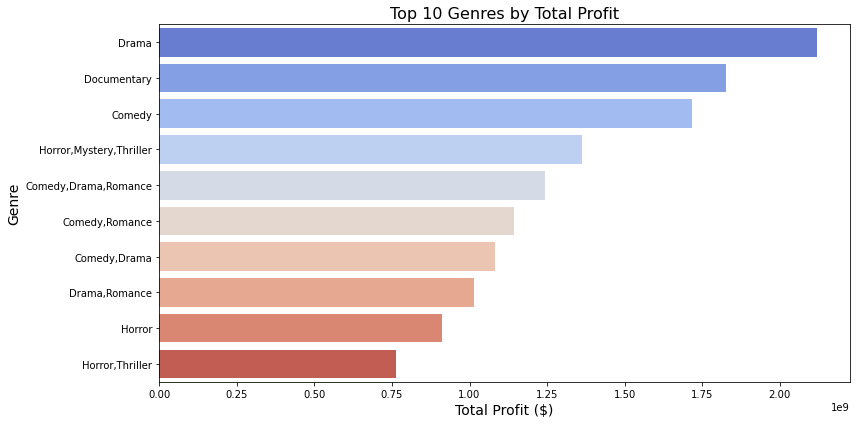

In [30]:
# Explode the dataframe so each genre gets its own row
exploded_df = final_df.explode('genres')

# Group by genre and calculate total profit
top_10_genres = exploded_df.groupby('genres')['movie_profit/loss'].sum().sort_values(ascending=False).head(10)

# Plot a barplot using the Seaborn library 
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_genres.values, y=top_10_genres.index, palette='coolwarm')
plt.title('Top 10 Genres by Total Profit', fontsize=16)
plt.xlabel('Total Profit ($)', fontsize=14)
plt.ylabel('Genre', fontsize=14)
plt.tight_layout()

# Save plot to images folder
plt.savefig("./images/average-profit-by-genre.png", dpi=300, facecolor='white')
plt.show()

#### 4.1.2 Hypothesis Testing
- **H₀**: Movie genre has no effect on profitability.  
- **H₁**: Movie genre affects profitability.  
- **Test**: One-way ANOVA.

In [31]:
# Explode the `genres` column' values:
exploded_df = final_df.explode('genres')
from scipy import stats

# Groupby `genres` and `movie_profits/loss`
grouped_genres = exploded_df.groupby('genres')['movie_profit/loss'].apply(list)

# Perform One-way ANOVA test 
from scipy import stats

f_stat, p_value = stats.f_oneway(*grouped_genres)

# Print f-statistic and p-value
print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

f-statistic: 1.3661346210888703
p-value: 6.471994402133455e-05


Since the p-value is less than 0.05; we reject the Null Hypothesis. The test confirms there exists a statistically signficant relationship between genre and a movie's profitability. 

### 4.2 Seasonal Impact on Profitability

#### 4.2.1 Visualize Average Movie Profitability Based on Season

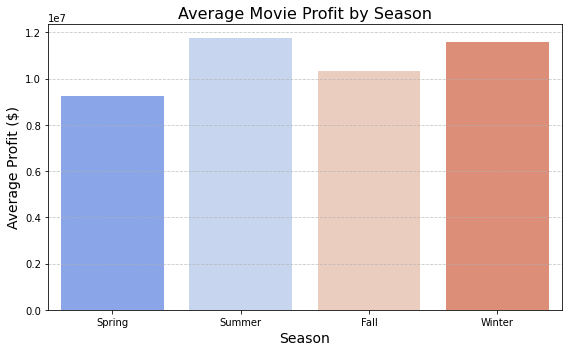

In [32]:
# average profit by season
season_profit = final_df.groupby('season')['movie_profit/loss'].mean().reset_index()

# Sort seasons in logical order (optional but cleaner)
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
season_profit['season'] = pd.Categorical(season_profit['season'], categories=season_order, ordered=True)
season_profit = season_profit.sort_values('season')

# Plot a barplot using the Seaborn library
plt.figure(figsize=(8, 5))
sns.barplot(data=season_profit, x='season', y='movie_profit/loss', palette='coolwarm')
plt.title('Average Movie Profit by Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Average Profit ($)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save plot to images folder
plt.savefig("./images/average-movie-profit-by-season.png", dpi=300, facecolor='white')
plt.show()

#### 4.2.2 Hypothesis Testing
- **H₀**: Release season has no effect on profitability.  
- **H₁**: Release season affects profitability.  
- **Test**: One-way ANOVA.

In [33]:
from scipy import stats

# Groupby `seasons` and `movie_profits/loss`
grouped_seasons = final_df.groupby('season')['movie_profit/loss'].apply(list)

# Perform One-way ANOVA test
f_stat, p_value = stats.f_oneway(*grouped_seasons)

# Print f-statistic and p-value
print(f"f-statistic: {f_stat}")
print(f"p-value: {p_value}")

f-statistic: 0.9970834690490168
p-value: 0.39314777470513895


Since the p-value is greater than 0.05; we fail to reject the Null Hypothesis. Additionally, the f-statistic (0.997) is close to 1 which suggests that the variability between the group averages is similar to the variability within the groups. Hence, we don't have enough evidence to conclude that there exists a statistically significant difference in the average profits of movies released in different seasons. Although the visualization reveals that the average profit achieved by movies released in Summer is higher compared to other seasons, the difference is deemed statistically insignificant at a significance level of 0.05.  

### 4.3 Budget Impact on Profitability

#### 4.3.1 Visualize Relationship Between Production Budget and Profitability

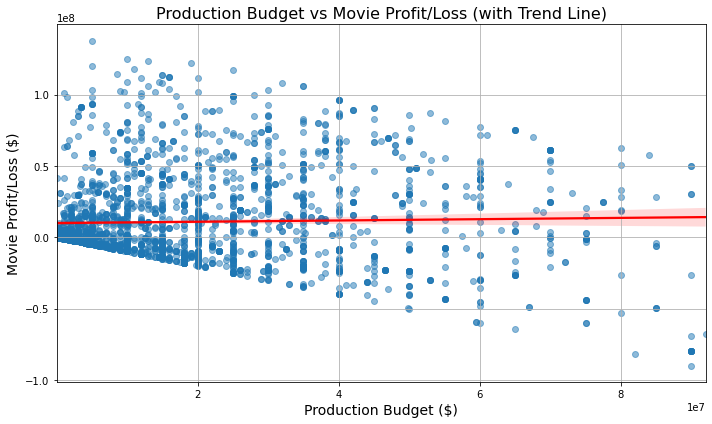

In [34]:
# Plot a regplot using the Seaborn library
plt.figure(figsize=(10, 6))
sns.regplot(data=final_df, x='production_budget',y='movie_profit/loss',scatter_kws={'alpha':0.5},line_kws={'color':'red'})
plt.title('Production Budget vs Movie Profit/Loss (with Trend Line)', fontsize=16)
plt.xlabel('Production Budget ($)', fontsize=14)
plt.ylabel('Movie Profit/Loss ($)', fontsize=14)
plt.grid(True)
plt.tight_layout()

# Save plot to images folder
plt.savefig("./images/production-budget-vs-profit-loss.png", dpi=300, facecolor='white')
plt.show()

#### 4.3.2 Hypothesis Testing
- **H₀**: Production budget has no correlation with profitability.  
- **H₁**: Production budget is correlated with profitability.  
- **Test**: Pearson correlation.

In [35]:
from scipy import stats

# Get the two continuous variables
budget = final_df['production_budget']
profit = final_df['movie_profit/loss']

# Perform Pearson correlation test
correlation_coefficient, p_value = stats.pearsonr(budget, profit)

# Print Pearson correlation coefficient and p-value
print(f"correlation coefficient: {correlation_coefficient}")
print(f"p-value: {p_value}")

correlation coefficient: 0.029035105287411395
p-value: 0.13247621978981639


Since the p-value (0.133) is greater than 0.05; we fail to reject Null Hypothesis. However, the correlation coefficient (0.029) indicates a very weak positive linear relationship between production budget and a movie's profitability. 

### 4.4 Star Power Effect 

#### 4.4.1 Visualize Top Performing Directors and Actors 
To highlight the best performing talent in the film production industry; we visualized top-10 directors and top-10 actors based on `movie_profit/loss`

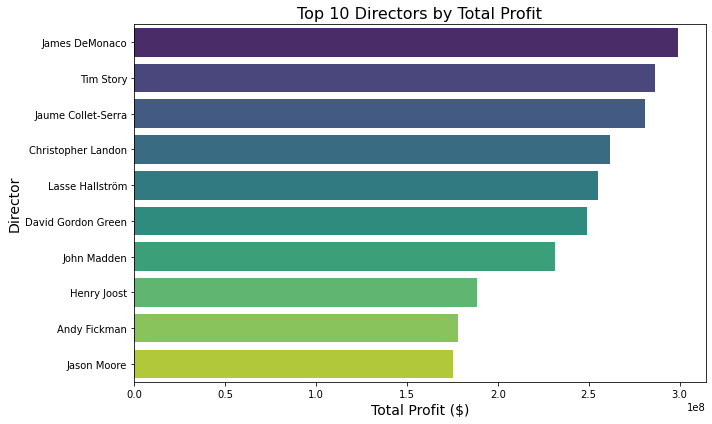

In [36]:
# Visualize top-10 best performing directors based on profits
top_directors = (final_df.groupby('director_name')['movie_profit/loss'].sum().sort_values(ascending=False).head(10))

# Plot a barplot using the Seaborn library
plt.figure(figsize=(10,6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='viridis')
plt.title('Top 10 Directors by Total Profit', fontsize=16)
plt.xlabel('Total Profit ($)', fontsize=14)
plt.ylabel('Director', fontsize=14)
plt.tight_layout()

# Save plot to images folder
plt.savefig("./images/top10-directors-by-total-profit.png", dpi=300, facecolor='white')
plt.show()


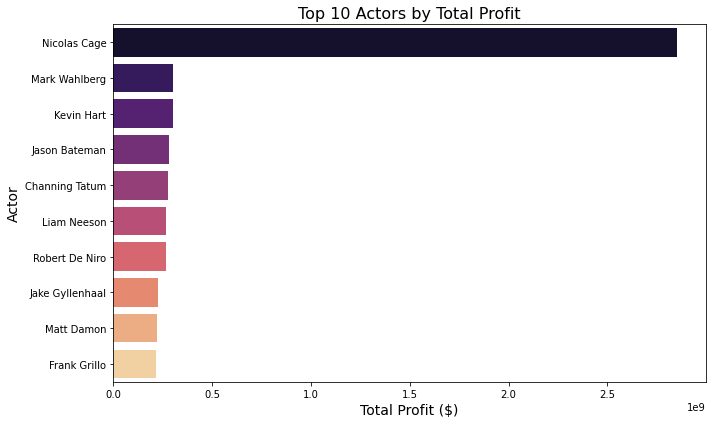

In [37]:
# Visualize top-10 best performing actors based on profits
top_actors = (final_df.groupby(['actor_name'])['movie_profit/loss'].sum().sort_values(ascending=False).head(10))
top_actors_df = top_actors.reset_index()
top_actors_df.columns = ['actor', 'count']

# Plot a barplot using the Seaborn library
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='actor', data=top_actors_df, palette='magma')
plt.title('Top 10 Actors by Total Profit', fontsize=16)
plt.xlabel('Total Profit ($)', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.tight_layout()

# Save plot to images folder
plt.savefig("./images/top10-actors-by-total-profit.png", dpi=300, facecolor='white')
plt.show()

#### 4.4.2 Hypothesis Testing
- **H₀**: The involvement of top talent and a movie's profitability are independent.  
- **H₁**: The involvement of top talent and a movie's profitability are dependent.  
- **Test**: Chi-square test of independence.

In [38]:
# Find actors with highest average profits
top_actors = final_df.groupby('actor_name')['movie_profit/loss'].mean().sort_values(ascending=False).head(10).index.tolist()

# Create a new column: whether the actor is a top actor
final_df['top_actor'] = final_df['actor_name'].isin(top_actors)

from scipy.stats import chi2_contingency

# Create a 'high_profit' column (1 if profit > median, 0 if not)
median_profit = final_df['movie_profit/loss'].median()
final_df['high_profit'] = (final_df['movie_profit/loss'] > median_profit).astype(int)

# Create a contingency table
contingency_table = pd.crosstab(final_df['top_actor'], final_df['high_profit'])

# Run chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Print Chi-square statistic and p-value
print(f"Chi-square statistic: {chi2}")
print(f"p-value: {p_value}")

Chi-square statistic: 8.130269058295964
p-value: 0.004353228656008156


Since the p-value is lesser than 0.05; we reject the Null Hypothesis. Hence, a movie's profitability has a statisitically significant dependence on the involvement of top-talent. Additionally, the large Chi-square statistic (8.13) indicates a strong association between the involvement of top talent and a movie's profitability. 

## 5. Business Recommendations 

Based on our analysis of profitability drivers, we recommend the following strategies for the new movie studio:

1. **Focus on High‐Returning Genres**  
   - Prioritize the production of top-performing movie genres: **Drama, Documentary, Comedy, Horror, Mystery, Thriller, and Romance**.  
   
   
2. **Leverage Star Power Selectively**  
   - Cast **top-performing actors** and **directors** but negotiate contract deals to control against excessive budget overshoots. 
   
   - Strike an effective balance in casting top-performing actors and emerging talent.

   
3. **Optimize Release Timing**  
   - Schedule major releases in **Summer** to optimize Box-Office grossing.  

## 6. Next Steps

* Conduct case studies on top-performing studio based on highest grossing movies in Box Office revenue.
* Initialize and diversify professional networks with top performing actors (captured in the top 10 Actors by Total Profit plot) and directors (captured in the top 10 Directors by Total Profit plot).
* Launch talent search operations to identify actors with substantial acting potential.
* Conduct extensive research on latest technologies (hardware and software) in film production.